In [1]:
%load_ext google.cloud.bigquery

# "Will it snow tomorrow?" - The time traveler asked
The following dataset contains climate information form over 9000 stations accross the world. The overall goal of these subtasks will be to predict whether it will snow tomorrow 11 years ago. So if today is 2021.02.15 then the weather we want to forecast is for the date 2010.02.16. You are suppsed to solve the tasks using Big Query, which can be used in the Jupyter Notebook like it is shown in the following cell. For further information and how to used BigQuery in Jupyter Notebook refer to the Google Docs. 

The goal of this test is, to test your coding knowledge in Python, BigQuery and Pandas as well as your understanding of Data Science. If you get stuck at the first part, you can use the replacement data provided in the second part

In [2]:
%%bigquery 
SELECT
*,
FROM `bigquery-public-data.samples.gsod`
LIMIT 20 


Downloading: 100%|██████████| 20/20 [00:02<00:00,  7.49rows/s]


,station_number,wban_number,year,month,day,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,mean_sealevel_pressure,...,min_temperature,min_temperature_explicit,total_precipitation,snow_depth,fog,rain,snow,hail,thunder,tornado
0,39730,99999,1929,10,20,52.799999,4,45.500000,4.0,NaN,...,NaN,None,0.0,NaN,False,False,False,False,False,False
1,33110,99999,1929,12,18,47.500000,4,44.000000,4.0,NaN,...,NaN,None,NaN,NaN,False,False,False,False,False,False
2,37770,99999,1931,4,24,50.200001,4,44.299999,4.0,NaN,...,NaN,None,NaN,NaN,False,False,False,False,False,False
3,726810,24131,1931,6,23,65.099998,24,41.500000,8.0,NaN,...,NaN,None,0.0,NaN,False,False,False,False,False,False
4,726810,24131,1931,3,2,42.799999,24,31.500000,8.0,NaN,...,NaN,None,0.0,NaN,False,False,False,False,False,False
5,726810,24131,1931,9,17,67.000000,24,40.500000,8.0,NaN,...,NaN,None,0.0,NaN,False,False,False,False,False,False
6,726810,24131,1931,8,7,68.400002,24,37.200001,8.0,NaN,...,NaN,None,0.0,NaN,False,False,False,False,False,False
7,726810,24131,1932,7,14,64.099998,24,54.099998,8.0,NaN,...,NaN,None,NaN,NaN,False,False,False,False,False,False
8,726810,24131,1932,10,23,41.099998,24,31.000000,8.0,NaN,...,NaN,None,NaN,NaN,False,False,False,False,False,False
9,726810,24131,1932,1,5,24.600000,24,21.100000,8.0,NaN,...,NaN,None,NaN,NaN,True,True,True,True,True,True


## Part 1

### 1. Task
*Change the date format to 'YYYY-MM-DD' and select the data from 2006 till 2010 for station numbers including and between 725300 and 726300 , and save it as a pandas dataframe. Note the maximum year available is 2010.*

In [ ]:
# BigQuery Authorization
#import os
#os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="sl-ds-coding-challenge.json"

In [3]:
# import pandas
import pandas as pd

In [4]:
%%bigquery weather_df
SELECT 
DATE(year, month, day) as date, * EXCEPT(year, month, day), 
FROM `bigquery-public-data.samples.gsod`
WHERE year BETWEEN 2006 AND 2010 
AND station_number BETWEEN 725300 AND 726300

Downloading: 100%|██████████| 323801/323801 [00:10<00:00, 31579.24rows/s]


*Comments: testing simple logical conditining, knowledge about sql syntax, and ability to find in doc how to store as df variable*

### 2. Task 
*From here want to work with the data from all stations that have information from 2005 till 2010. Select the relevant data.*

Getting the max date:

In [5]:
%%bigquery 
SELECT MAX(DATE(year, month, day))
FROM `bigquery-public-data.samples.gsod`

Downloading: 100%|██████████| 1/1 [00:02<00:00,  2.58s/rows]


,f0_
0,2010-04-16


In [6]:
# total number of days between 2005 and 2010
from datetime import datetime
datetime.strptime("2010-04-16", "%Y-%m-%d") - datetime.strptime("2005-01-01", "%Y-%m-%d")

datetime.timedelta(days=1931)

There are 1,931 dates between 2005-01-01 and the max date in the time series data, which is 2010-04-16. Hence, I select all stations with (at least) 1931 rows.

In [7]:
%%bigquery weather
SELECT DATE(year, month, day) as date, * EXCEPT(year, month, day), 
FROM `bigquery-public-data.samples.gsod`
WHERE station_number IN (
    SELECT station_number
    FROM `bigquery-public-data.samples.gsod`
    WHERE (year BETWEEN 2005 AND 2010)
    GROUP BY station_number
    HAVING COUNT(*) >= 1931
) AND year BETWEEN 2005 AND 2010

Downloading: 100%|██████████| 200825/200825 [00:07<00:00, 28263.79rows/s]


*Do a first analysis of the remaining dataset, clean or drop data depending on how you see appropriate.*

In [8]:
# set date as index
weather["date"] = pd.to_datetime(weather["date"])
weather.set_index("date", inplace=True)
weather.sort_index(inplace=True)

In [9]:
weather.groupby("station_number").size().max()

1932

The max length of the time series for a station number is 1,932, however, should be 1,931. Taking a closer look:

In [10]:
weather.groupby("station_number").filter(lambda x: len(x) > 1931)["station_number"].unique()

array([702740])

There is one station (702740) for which there are more than 1,931 dates. Check for duplicates:

In [11]:
is_dupl = weather.loc[weather["station_number"] == 702740].index.duplicated()
weather.loc[weather["station_number"] == 702740][is_dupl]

,station_number,wban_number,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,mean_sealevel_pressure,num_mean_sealevel_pressure_samples,mean_station_pressure,num_mean_station_pressure_samples,...,min_temperature,min_temperature_explicit,total_precipitation,snow_depth,fog,rain,snow,hail,thunder,tornado
date,,,,,,,,,,,,,,,,,,,,,
2008-11-20,702740,99999,12.3,23,7.1,23.0,1008.400024,23.0,NaN,NaN,...,NaN,None,0.0,2.0,False,False,False,False,False,False


Look at duplicated rows/dates:

In [12]:
dupl_date = weather.loc[weather["station_number"] == 702740][is_dupl].index
weather.loc[weather["station_number"] == 702740].loc[dupl_date]

,station_number,wban_number,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,mean_sealevel_pressure,num_mean_sealevel_pressure_samples,mean_station_pressure,num_mean_station_pressure_samples,...,min_temperature,min_temperature_explicit,total_precipitation,snow_depth,fog,rain,snow,hail,thunder,tornado
date,,,,,,,,,,,,,,,,,,,,,
2008-11-20,702740,25331,12.3,23,7.1,23.0,1008.400024,23.0,NaN,NaN,...,NaN,None,0.0,2.0,False,False,False,False,False,False
2008-11-20,702740,99999,12.3,23,7.1,23.0,1008.400024,23.0,NaN,NaN,...,NaN,None,0.0,2.0,False,False,False,False,False,False


Duplicate entries for 2008-11-20. Both entries are identical except the wban_number variable. Since wban_number is just another identifier and hence does probably not contain information about whether it will be snowing or not, I drop this column and remove the duplicate row.

In [13]:
weather.drop(columns="wban_number", inplace=True)
weather.drop_duplicates(inplace=True)

In [14]:
weather.groupby("station_number").size().value_counts()

1931    103
1930      1
dtype: int64

After dropping the duplicated rows, there is one station_number for which there are only 1,930 data points instead of 1,931. For simplicity reasons, I will drop this station from the data, the alternative would be add the missing date and impute with meaningful information, e.g. mean value for same date from remaining years.

In [15]:
# find the station number for which there are 1930 only
weather.groupby("station_number").filter(lambda x: len(x) == 1930)["station_number"].unique() 

array([723700])

In [16]:
#drop the station 723700
weather = weather[weather.station_number != 723700]

### Inspecting Columns:

First, I look at the distribution of the data:

In [17]:
weather.describe()

,station_number,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,mean_sealevel_pressure,num_mean_sealevel_pressure_samples,mean_station_pressure,num_mean_station_pressure_samples,mean_visibility,num_mean_visibility_samples,mean_wind_speed,num_mean_wind_speed_samples,max_sustained_wind_speed,max_gust_wind_speed,max_temperature,min_temperature,total_precipitation,snow_depth
count,198893.000000,198893.000000,198893.000000,198645.000000,198645.000000,179050.000000,179050.000000,14683.000000,14683.000000,198887.000000,198887.000000,198874.000000,198874.000000,198558.000000,109206.000000,198884.000000,0.0,191736.000000,8320.000000
mean,720904.339806,55.437636,23.681381,42.339489,23.666677,1015.304899,22.313734,996.566948,21.682490,9.024003,23.678084,6.774072,23.653524,13.586315,23.099390,45.699631,NaN,0.084013,10.529760
std,6991.174501,20.177197,1.357134,19.322326,1.403610,7.792030,2.777258,26.399898,5.669421,1.826860,1.362635,3.762625,1.433375,5.552701,6.837255,19.985253,NaN,0.294973,10.552072
min,701740.000000,-55.200001,4.000000,-37.599998,4.000000,960.500000,4.000000,756.700012,4.000000,0.100000,4.000000,0.000000,4.000000,1.900000,9.900000,-56.900002,NaN,0.000000,1.200000
25%,722140.000000,42.700001,24.000000,28.799999,24.000000,1011.500000,22.000000,987.099976,23.000000,8.500000,24.000000,4.100000,24.000000,9.900000,18.100000,33.099998,NaN,0.000000,2.000000
50%,722976.000000,57.900002,24.000000,44.400002,24.000000,1015.599976,24.000000,1002.200012,24.000000,9.800000,24.000000,6.100000,24.000000,13.000000,22.000000,48.000000,NaN,0.000000,7.100000
75%,724640.000000,71.000000,24.000000,57.400002,24.000000,1019.799988,24.000000,1012.799988,24.000000,10.000000,24.000000,8.700000,24.000000,16.900000,27.000000,60.799999,NaN,0.010000,15.000000
max,725260.000000,105.599998,24.000000,80.099998,24.000000,1048.699951,24.000000,1039.199951,24.000000,63.799999,24.000000,41.000000,24.000000,64.900002,87.000000,95.000000,NaN,10.310000,79.900002


There are no obviously faulty entries at the first look, like for example missing values tagged as -9999. I now take a look at missing values:

In [18]:
missings = weather.isna().sum()
miss_perc = missings / len(weather) * 100
round(miss_perc, 1)

station_number                          0.0
mean_temp                               0.0
num_mean_temp_samples                   0.0
mean_dew_point                          0.1
num_mean_dew_point_samples              0.1
mean_sealevel_pressure                 10.0
num_mean_sealevel_pressure_samples     10.0
mean_station_pressure                  92.6
num_mean_station_pressure_samples      92.6
mean_visibility                         0.0
num_mean_visibility_samples             0.0
mean_wind_speed                         0.0
num_mean_wind_speed_samples             0.0
max_sustained_wind_speed                0.2
max_gust_wind_speed                    45.1
max_temperature                         0.0
max_temperature_explicit                0.0
min_temperature                       100.0
min_temperature_explicit              100.0
total_precipitation                     3.6
snow_depth                             95.8
fog                                     0.0
rain                            

Looking at the above output one can see that there are mostly missing values for the variables "mean_station_pressure", "num_mean_station_pressure_samples", "max_gust_wind_speed", "min_temperature", "min_temperature_explicit", "snow_depth" hence I drop these columns entirely.

In [19]:
weather = weather.drop(columns=["mean_station_pressure", "num_mean_station_pressure_samples", "max_gust_wind_speed", "min_temperature", "min_temperature_explicit", "snow_depth"])

From the [documentation for the data](https://console.cloud.google.com/bigquery?p=bigquery-public-data&d=samples&t=gsod&page=table&hl=de&_ga=2.212216276.1106550381.1617978275-448503843.1614889316&project=sl-ds-coding-challenge), we can identify further variables, who do not provide information for forecasting snow:
- *num_mean_temp_samples*: The number of observations used to calculate mean_temp.
- *num_mean_dew_point_samples*: The number of observations used to calculate mean_dew_point.
- *num_mean_sealevel_pressure*: The number of observations used to calculate mean_sealevel_pressure.
- *num_mean_visibility*: The number of observations used to calculate mean_visibility.
- *num_mean_wind_speed_samples*: The number of observations used to calculate mean_wind_speed.
- *max_temperature_explicit:* Indicates the source of max_temperature

Moreover, these variables do not contain much variation anyway:

In [20]:
cols = [name for name in weather.columns if 'num_' in name]
for col in cols:
    print("Variable name: {}".format(col))
    print(weather[col].value_counts(normalize=True))

Variable name: num_mean_temp_samples
24    0.881419
23    0.065915
22    0.019216
21    0.009110
20    0.005324
19    0.003007
17    0.002680
18    0.002544
15    0.002257
16    0.002217
14    0.001609
12    0.001207
13    0.001001
9     0.000709
10    0.000659
11    0.000573
8     0.000176
7     0.000156
6     0.000085
5     0.000070
4     0.000065
Name: num_mean_temp_samples, dtype: float64
Variable name: num_mean_dew_point_samples
24.0    0.878457
23.0    0.066737
22.0    0.019598
21.0    0.009489
20.0    0.005583
19.0    0.003217
17.0    0.002754
18.0    0.002708
16.0    0.002336
15.0    0.002311
14.0    0.001686
12.0    0.001299
13.0    0.001042
9.0     0.000740
10.0    0.000700
11.0    0.000619
8.0     0.000247
7.0     0.000181
6.0     0.000116
5.0     0.000096
4.0     0.000086
Name: num_mean_dew_point_samples, dtype: float64
Variable name: num_mean_sealevel_pressure_samples
24.0    0.542318
23.0    0.132399
22.0    0.084423
21.0    0.061229
20.0    0.045747
19.0    0.034867
18.0

In [21]:
# drop columns
weather = weather.drop(columns = cols)
weather = weather.drop(columns = "max_temperature_explicit")

## Correlation between Variables and Target

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

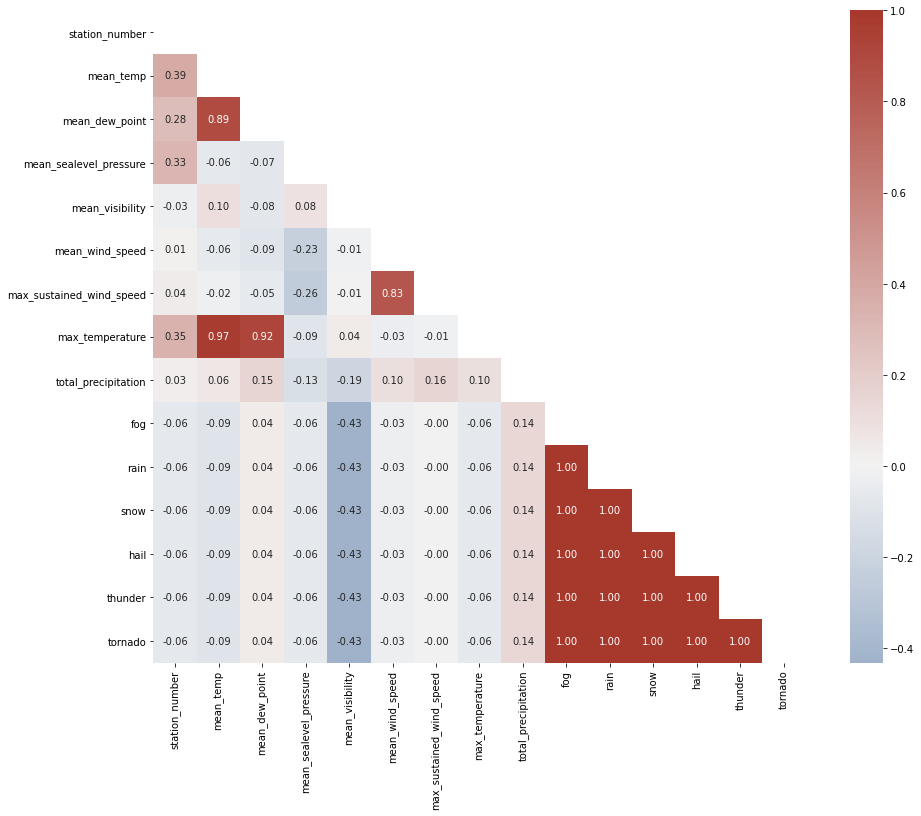

In [27]:
corrMat = weather.corr() # calculate correlation matrix
mask = np.triu(np.ones_like(corrMat, dtype=bool))
plt.figure(figsize=(16, 12))

# custom palette
cmap = sns.diverging_palette(250, 15, s=75, l=40,
                             n=9, center="light", as_cmap=True)

# create correlation plot
sns.heatmap(corrMat, mask=mask, center=0, annot=True,
             fmt='.2f', square=True, cmap=cmap)
# show plot
plt.show()

In [28]:
for col in ["fog", "rain", "hail", "thunder", "tornado"]:
    print(sum(weather.snow != weather[col]))

0
0
0
0
0


The binary variables indicating snow, rain, hail, thunder, and tornado are perfectly multicollinear. Since this leads to the fact that predicting whether it snows is exactly the same problem as predicting whether it rains, whether there is hail, etc. I remove these binary variables from the dataset as well.

In [29]:
weather = weather.drop(columns=["fog", "rain", "hail", "thunder", "tornado"])

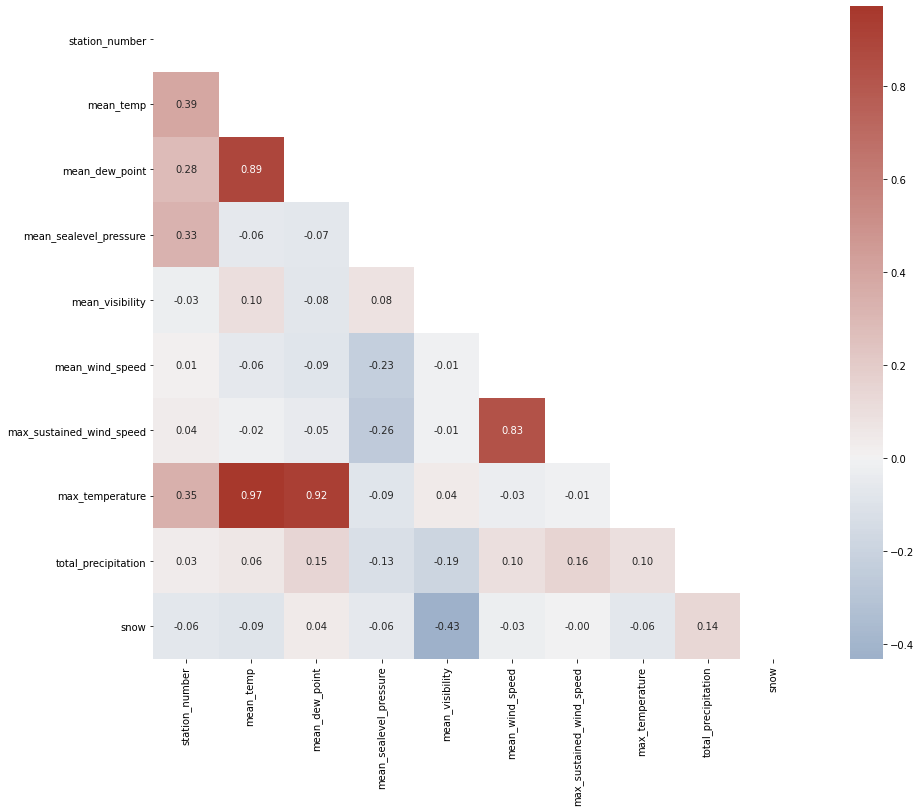

In [30]:
# repeating the correlation matrix
corrMat = weather.corr() # calculate correlation matrix
mask = np.triu(np.ones_like(corrMat, dtype=bool))
plt.figure(figsize=(16, 12))

# custom palette
cmap = sns.diverging_palette(250, 15, s=75, l=40,
                             n=9, center="light", as_cmap=True)

# create correlation plot
sns.heatmap(corrMat, mask=mask, center=0, annot=True,
             fmt='.2f', square=True, cmap=cmap)
# show plot
plt.show()

We furthermore see that mean_temp and max_temperature are highly correlated with a correlation coefficient of 0.97. Moreover, when taking a closer look at both variables, a kind of strange picture emerges: 

In [31]:
sum(weather.mean_temp > weather.max_temperature) / len(weather)

0.9998793321031911

The mean temperature is higher than the max temperature for almost all entries in the data. A look in the data description reveals the following: `The time that this value is reported differs by country and region, so this value will sometimes not be the maximum for the calendar day.`. Moreover, it is reasonable to assume that the max temperature does not contain as much information about whether it may snow as the mean temperature. Hence, the max_temperature variable is dropped as well.

In [32]:
weather = weather.drop(columns=["max_temperature"])

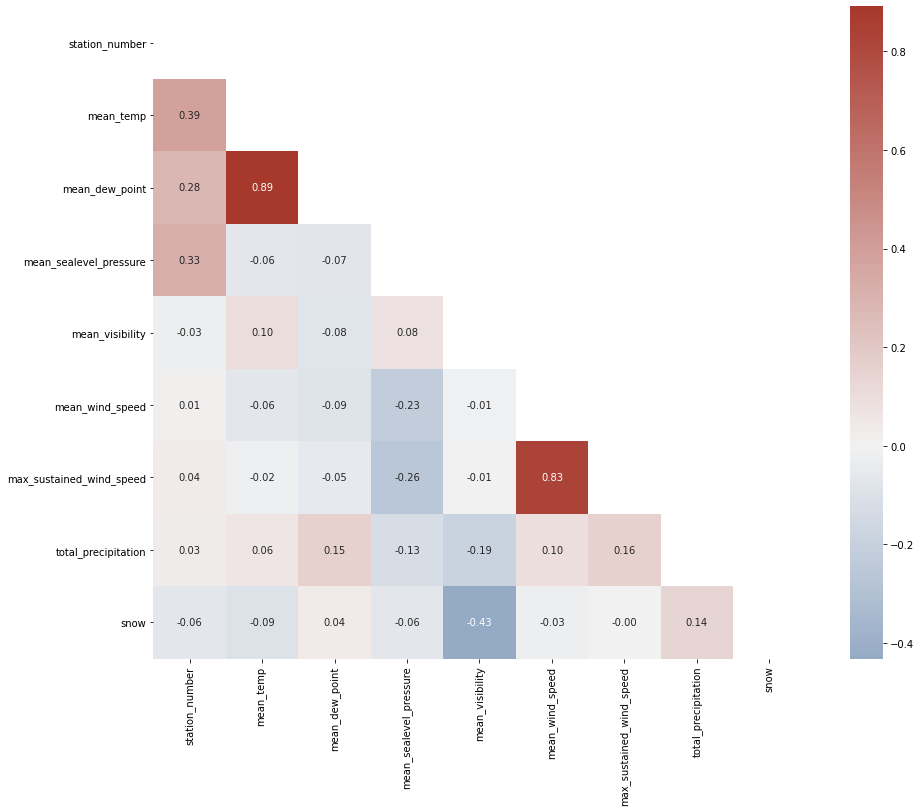

In [33]:
# repeating the correlation matrix
corrMat = weather.corr() # calculate correlation matrix
mask = np.triu(np.ones_like(corrMat, dtype=bool))
plt.figure(figsize=(16, 12))

# custom palette
cmap = sns.diverging_palette(250, 15, s=75, l=40,
                             n=9, center="light", as_cmap=True)

# create correlation plot
sns.heatmap(corrMat, mask=mask, center=0, annot=True,
             fmt='.2f', square=True, cmap=cmap)
# show plot
plt.show()

## Data Imputation

The last step before the modeling starts is to impute missing values in the data. Again, taking a look at the number of remaining missing values:

In [34]:
miss = weather.isna().sum()
miss

station_number                  0
mean_temp                       0
mean_dew_point                248
mean_sealevel_pressure      19843
mean_visibility                 6
mean_wind_speed                19
max_sustained_wind_speed      335
total_precipitation          7157
snow                            0
dtype: int64

There are a lot of missing values for mean_sealevel_pressure. Taking a closer look:

In [35]:
# count non-missing values per station
weather.groupby("station_number")["mean_sealevel_pressure"].agg("count")

station_number
701740    1931
702000    1931
702190    1930
702310    1928
702610    1928
          ... 
725200    1931
725205    1929
725240    1931
725246    1929
725260    1924
Name: mean_sealevel_pressure, Length: 103, dtype: int64

In [36]:
# check whether there are stations that have only missing values
sum(weather.groupby("station_number")["mean_sealevel_pressure"].agg("count") == 0)

10

In [37]:
# get stations for which there are only missings
empty_sea = weather.groupby("station_number")["mean_sealevel_pressure"].agg("count") == 0
weather.groupby("station_number")["mean_sealevel_pressure"].agg("count")[empty_sea]

station_number
703870    0
720258    0
720308    0
722075    0
722094    0
722129    0
722324    0
722332    0
722598    0
725128    0
Name: mean_sealevel_pressure, dtype: int64

Since there are only missings for these stations there is no reasonable approach to impute missing values for these stations. Hence, I drop them from the dataset.

In [38]:
stationToRemove = list(weather.groupby("station_number")["mean_sealevel_pressure"].agg("count")[empty_sea].reset_index().station_number)
weather = weather[~weather["station_number"].isin(stationToRemove)]

In [39]:
miss = weather.isna().sum()
miss

station_number                 0
mean_temp                      0
mean_dew_point               231
mean_sealevel_pressure       533
mean_visibility                4
mean_wind_speed               19
max_sustained_wind_speed     322
total_precipitation         1946
snow                           0
dtype: int64

Since there are only relatively few missings left, I impute these now. Since the data are time series data on weather information, it is very reasonable to assume that there are no huge steps or jumps in the data. Hence, I am using linear interpolation to impute the values.

In [40]:
weather = weather.interpolate()

### Last Data Checks

In [41]:
weather.describe()

,station_number,mean_temp,mean_dew_point,mean_sealevel_pressure,mean_visibility,mean_wind_speed,max_sustained_wind_speed,total_precipitation
count,179583.000000,179583.000000,179583.000000,179583.000000,179583.000000,179583.000000,179583.000000,179583.000000
mean,720968.075269,55.874898,42.623992,1015.303030,9.004936,6.793438,13.581062,0.089788
std,7119.498991,20.031881,19.318328,7.788292,1.832410,3.787890,5.593906,0.303719
min,701740.000000,-55.200001,-37.599998,960.500000,0.100000,0.000000,1.900000,0.000000
25%,722223.000000,43.500000,29.000000,1011.500000,8.500000,4.100000,9.900000,0.000000
50%,723120.000000,58.299999,44.799999,1015.599976,9.800000,6.100000,13.000000,0.000000
75%,724650.000000,71.300003,57.599998,1019.799988,10.000000,8.700000,16.900000,0.020000
max,725260.000000,105.599998,80.099998,1048.699951,63.799999,41.000000,64.900002,10.310000


There are no suspicious entries in the above table which might indicate faulty data points, like for example unreasonably high or low temperatures. Hence, I will start the modeling part now.

*data cleansing and abstraction where appropriate, able to identifie columns that can be dropped, which information might be usefull and possible data imputation*

### 3. Task
*Now it is time to split the data, into a training, evaluation and test set. As a reminder, the date we are trying to predict snow fall for is the following, and hence should constitute your test set.*

In [ ]:
import datetime, timedelta

str(datetime.datetime.today()- datetime.timedelta(days=11*365)).split(' ')[0]

# TASK:
## Part 2
If you made it up to here all by yourself, you can use your prepared dataset to train an Algorithm of your choice to forecast whether it will snow on the following date for each station in this dataset:

In [ ]:
import datetime, timedelta

str(datetime.datetime.today()- datetime.timedelta(days=11*365)).split(' ')[0]

# TASK:
You are allowed to use any library you are comfortable with such as sklearn, tensorflow keras etc. 
If you did not manage to finish part one feel free to use the data provided in 'coding_challenge.csv' Note that this data does not represent a solution to Part 1. 